# Stochastic Procesess
Let's define a random variables sequence

$$\{y_{t}\}^{+\infty}_{-\infty} = \{ \dots,y_{-1},y_{0},y_{1},y_{2},\dots,y_{T},y_{T+1},y_{T+2},\dots \}$$

A time series is defined as a realization of the previous random variable sequence

$$\{y_{t}\}_{t=1}^{T} = \{ y_{1},y_{2},y_{3},\dots,y_{T-2},y_{T-1},y_{T}\}$$

## 1 White noise

This proces is denoted by

$$y_{t} = \epsilon_{t} $$
$$\epsilon_{t} \sim i.i.d.(0,\sigma^{2})$$

to understand better this proces, lets simulate a particular case of this

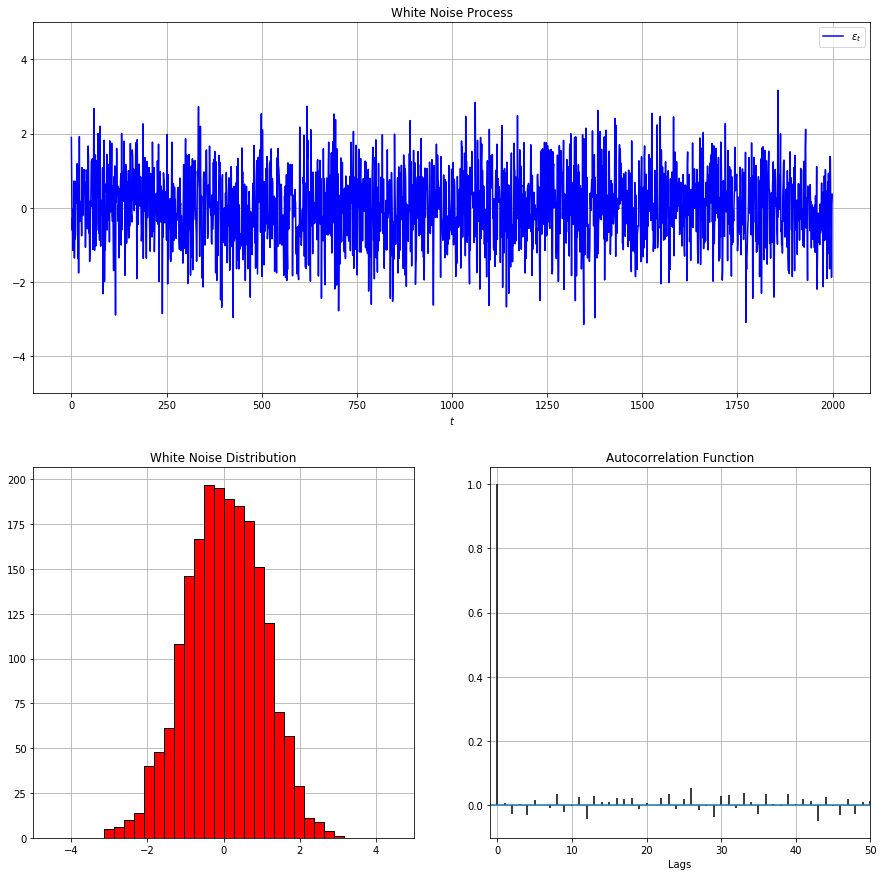

In [1]:
# import some useful libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
# seed the pseudorandom number generator
from random import seed
from random import gauss
# seed random number generator
seed(1)
# set the size of the sample size
T = 2100 # sample size 2000, we are going to burn the 100 first obs to avoid initalization problem
# generate some Gaussian values
e = []
for i in range(0,T):
    e.append(0)
for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
e = e[100:]    
# ploting the series

save_figures = True

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(e,'b',linewidth=1.5,label='$\epsilon_{t}$')
plt.grid(which='major')
plt.legend()
plt.title('White Noise Process')
plt.xlabel('$t$')
plt.ylim(-5,5)

plt.subplot(G[1,0])
plt.grid(which='major',zorder=0) # z order to set the layer that goes first
plt.hist(e,color='red',edgecolor='black',bins=24,zorder=3)
plt.title('White Noise Distribution')
plt.xlim(-5,5)

plt.subplot(G[1,1])
plt.acorr(e,maxlags=50) # z order to set the layer that goes first
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,50)

plt.show()

# Time series data

As we can see a White Noise Process has:

- Mean equal to zero: 
$$E[\epsilon_{t}]=0$$
- Variance equal to \sigma^{2}:
$$E[\epsilon_{t}^{2}]=\sigma^{2}$$ 
- No correlation in time: 
$$  cov (\epsilon_{t} \epsilon_{t-s})= \left \{
	       \begin{array}{ll}
            \sigma^{2}  & s = 0 \\
		     0          & s \neq 0
	       \end{array}
	     \right. $$
         
In this particular case when $\epsilon_{t}~\sim~N(0,\sigma^{2})$ and $\sigma^{2}$ is equal to 1, the process is called Gaussian White Noise Process


## 2 AR Procesess

### 2.1 AR(1)

An AR(1) process is a process that satifies the next equation in differences

$$y_{t} = c + \phi_{1}y_{t-1} + \epsilon_{t}$$
$$\epsilon_{t} \sim iid(0,\sigma^{2})$$

If we want to make inference with these procesess, they must satisfy stationarity conditions. 

- $E[y_{t}] = E[y_{t-1}] = \dots = E[y_{t-j}] = \mu$
- $var(y_{t}) = var(y_{t-1}) = \dots = var(y_{t-j}) = \Gamma_{0}$
- $cov(y_{t}y_{t-j}) = cov(y_{t-s}y_{t-s-j})= \Gamma_{j}$

In the case of AR(1) it must satisfy $|\phi_{1}|<1$ for stationarity.

**Mean of $y_{t}$**
$$ \begin{array}{rl}
    E[y_{t}] = & E[c] + E[\phi_{1} y_{t-1}] + E[\epsilon_{t}] \\
    E[y_{t}] = & c + \phi_{1} E[y_{t-1}] + 0 \\
    \mu      = & c + \phi_{1} \mu + 0 \\
    \mu      = & \dfrac{c}{1-\phi_{1}}
   \end{array}$$
   
**Variance of $y_{t}$**
$$ \begin{array}{rl}
    var(y_{t}) = & var(c) + var(\phi_{1} y_{t-1}) + var(\epsilon_{t}) \\
    var(y_{t}) = & 0 + \phi_{1}^{2} var(y_{t-1}) + \sigma^{2}\\
    \Gamma_{0} = & \phi_{1}^{2} \Gamma_{0} + \sigma^{2} \\
    \Gamma_{0} = & \dfrac{\sigma^{2}}{1-\phi_{1}^{2}}
   \end{array}$$

**Covariance of y_{t}**

Lets consider
$$(y_{t}-\mu) = \phi_{1}(y_{t-1}-\mu) + \epsilon_{t}$$

j=1: $\Gamma_{1} = E(y_{t}-\mu)(y_{t-1}-\mu)$

$$ \begin{array}{rl}
    E(y_{t}-\mu)(y_{t-1}-\mu) = & E[\phi_{1}(y_{t-1}-\mu)(y_{t-1}-\mu)] + E[\epsilon_{t}(y_{t-1}-\mu)] \\
    E(y_{t}-\mu)(y_{t-1}-\mu) = & \phi_{1}E[(y_{t-1}-\mu)^{2}] + 0\\
    \Gamma_{1} = & \phi_{1} \Gamma_{0} \\
   \end{array}$$
   
j=2: $\Gamma_{2} = E(y_{t}-\mu)(y_{t-2}-\mu)$

$$ \begin{array}{rl}
    E(y_{t}-\mu)(y_{t-2}-\mu) = & E[\phi_{1}(y_{t-1}-\mu)(y_{t-2}-\mu)] + E[\epsilon_{t}(y_{t-2}-\mu)] \\
    E(y_{t}-\mu)(y_{t-2}-\mu) = & \phi_{1}E[(y_{t-1}-\mu)(y_{t-2}-\mu)] + 0\\
    \Gamma_{2} = & \phi_{1} \Gamma_{1} \\
    \Gamma_{2} = & \phi_{1}^{2} \Gamma_{0} \\
   \end{array}$$
   
j=j: $\Gamma_{j} = E(y_{t}-\mu)(y_{t-j}-\mu)$

$$ \begin{array}{rl}
    E(y_{t}-\mu)(y_{t-j}-\mu) = & E[\phi_{1}(y_{t-1}-\mu)(y_{t-j}-\mu)] + E[\epsilon_{t}(y_{t-j}-\mu)] \\
    E(y_{t}-\mu)(y_{t-j}-\mu) = & \phi_{1}E[(y_{t-1}-\mu)(y_{t-j}-\mu)] + 0\\
    \Gamma_{j} = & \phi_{1} \Gamma_{j-1} \\
    \Gamma_{j} = & \phi_{1}^{j} \Gamma_{0} \\
   \end{array}$$   
   
From this part apears the ergodicity condition, that means
$$\sum_{j=0}^{\infty} |\Gamma_{j}| < + \infty$$

And we can construct the autocorrelation functión
$$\gamma_{j} = \dfrac{\Gamma_{j}}{\Gamma_{0}} = \phi_{1}^{j}~~~\forall j = 1,2,\dots$$

Lets simulate an AR(1) process

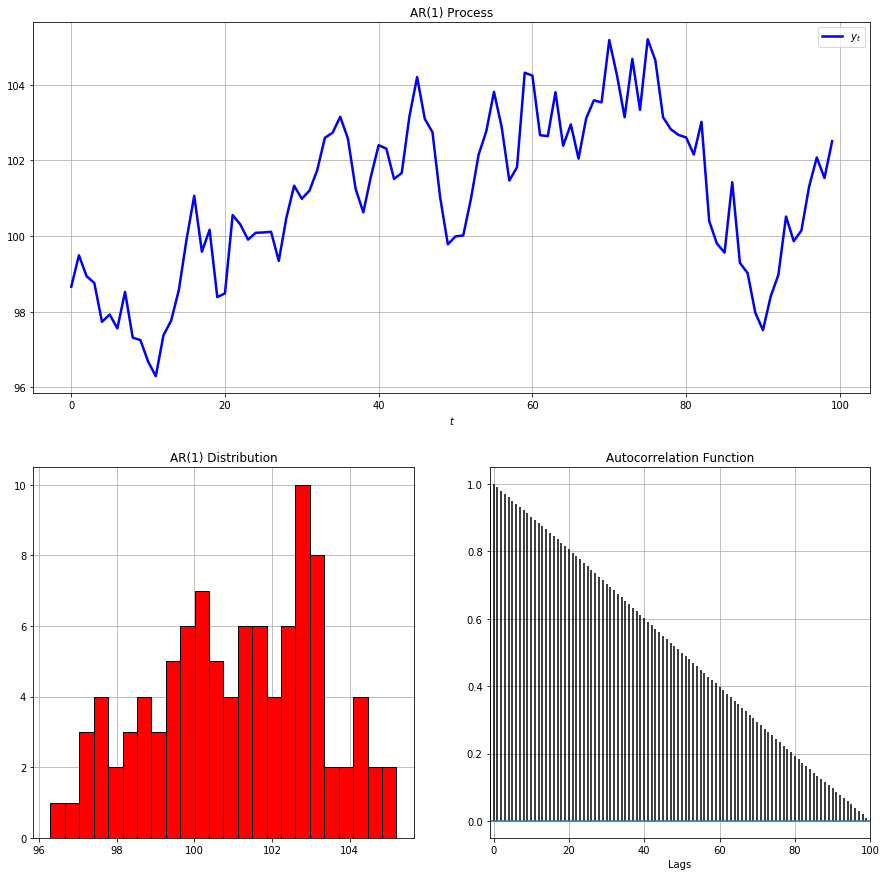

In [2]:
# seed random number generator
seed(1)
# set the size of the parameters
T     = 200   # sample size 200, we are going to burn the 100 first obs to avoid initalization problem
phi_1 = 0.9   # python let us to use greek lethers but without subindex
c     = 10    # the constant
# generate some Gaussian values
e = []
y = []
for i in range(0,T):
    e.append(0)
    y.append(0)
for j in range(T):
    e[j] = gauss(0, 1) #gaus need the mean "0" ans standard deviation "1", producess a normal distribution
for k in range(T-1):
    y[k+1] = c + phi_1*y[k] + e[k+1]

e = e[100:]
y = y[100:]

plt.figure(figsize=(15,15))
G = gridspec.GridSpec(2, 2)

plt.subplot(G[0, :])
plt.plot(y,'b',linewidth=2.5,label='$y_{t}$')
plt.grid(which='major')
plt.legend()
plt.title('AR(1) Process')
plt.xlabel('$t$')


plt.subplot(G[1,0])
plt.grid(which='major',zorder=0) # z order to set the layer that goes first
plt.hist(y,color='red',edgecolor='black',bins=24,zorder=3)
plt.title('AR(1) Distribution')


plt.subplot(G[1,1])
plt.acorr(y,maxlags=99) # z order to set the layer that goes first
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.grid(which='major')
plt.xlim(-1,100)

plt.show()

As we can see the value of $y_{t}$ depends on $y_{t-1}$ and the autocorrelation function shows a decay in the correlation between lags. Lets see about the mean, variance of 

Mean: we set $c=10$ and $\phi_{1}=0.9$
$$\mu = \dfrac{c}{1-\phi_{1}} =\dfrac{10}{1-0.9} = 100 $$

lets print the mean

In [3]:
print(np.mean(y))

101.07411983468774


As we can see, its a very close result because we simulated it and as long as $t\to\infty \Longrightarrow \bar{y} = \mu$

Variance:
$$\Gamma_{0} = \dfrac{\sigma^{2}}{1-\phi_{1}^{2}} = \dfrac{1}{1-0.9^{2}} = \dfrac{1}{1.895} = 5.263$$

In [4]:
print(np.var(y))

4.474854638957096


Again we have a close result. 

Covariance
$$\Gamma_{j} = \phi_{1}^{j} \Gamma_{0}$$

Let's see 
- $\Gamma_{1} = \phi_{1} \Gamma_{0} = 0.9*5.263 = 4.7367$
- $\Gamma_{2} = \phi_{1}^{2} \Gamma_{0} = 0.9^{2}*5.263 = 4.263$

In [5]:
print('Gamma_{1}=',np.cov(y[1:],y[0:-1])[0][1])
print('Gamma_{2}=',np.cov(y[2:],y[0:-2])[0][1])

Gamma_{1}= 4.017385499197371
Gamma_{2}= 3.6232877227668103
